In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import pandas as pd

# Pseudorandom Number Generation

In [4]:
def GeneratorOfPseudorandomNumber(X0 , a , c, m, n): # taking c = 0
    psudo_random_numbers = np.array([]) # empty arry
    for i in range(n):
        # X0 = (a*X0 + c) % m
        X0 = np.mod(np.multiply(a,X0), m) # add c => np.multiply(a,X0) + c
        # X = X0/m
        X = np.divide(X0,m)
        psudo_random_numbers = np.append(psudo_random_numbers, X)
    return psudo_random_numbers

In [5]:
X0 = 152
a = 7**5
c = 0
m = 2**15 - 1
n = 2**15 - 2

Pseudo_numbers = GeneratorOfPseudorandomNumber(X0,a,c,m,n)
psudo_num = pd.DataFrame(Pseudo_numbers)
psudo_num.to_csv('Pseudo-random-numbers.csv', index=False)

dist_numbers = np.array([])

for n in Pseudo_numbers:
    if n in dist_numbers:
        continue
    else:
        dist_numbers = np.append(dist_numbers, n)



# Bernoulli Distribution

$x\sim \text{bern}(p)$ where p is 0.5.

In [6]:
N = 100000
U = np.random.uniform(size=N)
p = 0.5


def Ber(U, p):
    bern_p = []
    for u in U:
        if u <= p:
            bern_p.append(1)
        else:
            bern_p.append(0)
    return bern_p

bern_p = Ber(U, p)
ber_expection = sum(bern_p) / N

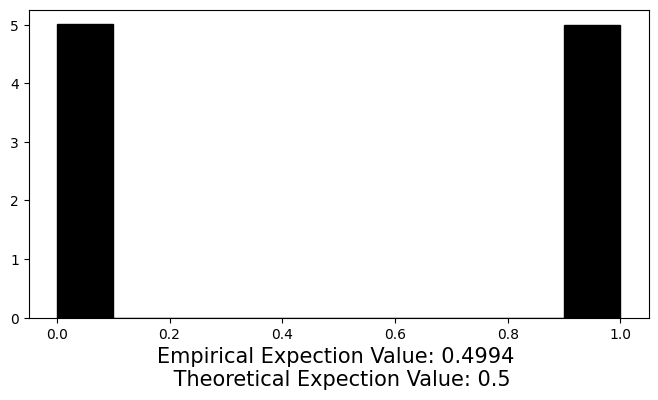

In [7]:
plt.figure(figsize=(8, 4))
plt.hist(bern_p ,color='black' ,edgecolor="black",density=True)
plt.xlabel(f"Empirical Expection Value: {ber_expection:.4f} \n Theoretical Expection Value: {p}",fontsize=15)
plt.show()

# Binomial distribution

$x\sim \text{bin}(n,p)$ where $n = 5$ and $ p = 0.6$

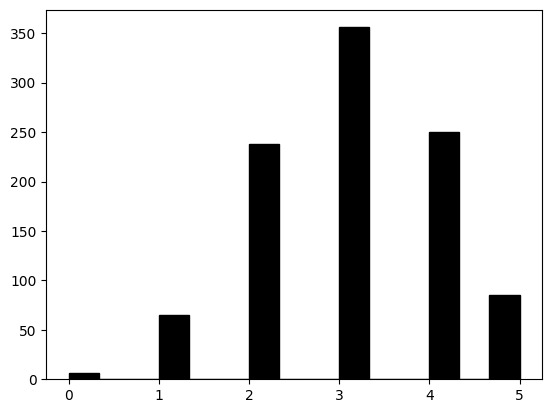

In [8]:
# numpy

Bin_np = np.random.binomial(n=5, p=0.6, size=1000)
plt.hist(Bin_np,color='black', edgecolor="black",bins=15)
plt.show()

let $x_i\sim \text{bern}(p)$, 
then $$\sum_{i=1}^{5}x_i\sim \text{bin}(n,p)$$

In [18]:
N = 100000
P = 0.32
n = 10


def binomial(n , P):
    bernoulli = np.array([])
    U = np.random.uniform(size=n)
    for u in U:
        if u <= P:
            bernoulli = np.append(bernoulli, 1)
        else:
            bernoulli = np.append(bernoulli, 0)
    return np.sum(bernoulli)

In [19]:
binomial_rvs = np.array([])
for _ in range(N):
    binomial_rvs = np.append(binomial_rvs, binomial(n, P))

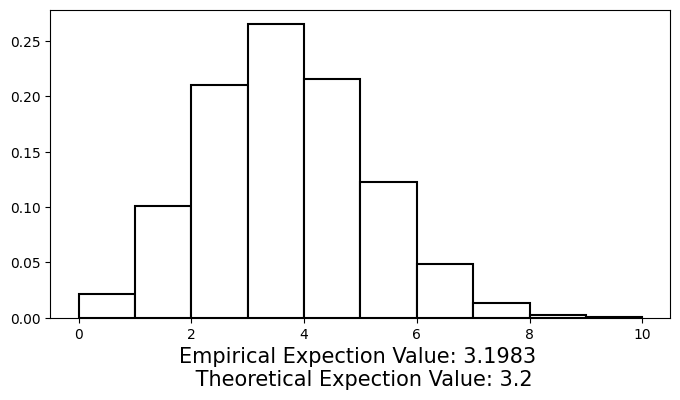

In [25]:
bin_expection = np.divide(np.sum(binomial_rvs), N)

plt.figure(figsize=(8, 4))
plt.hist(binomial_rvs,color='w', edgecolor="black",density=True, linewidth=1.5)
plt.xlabel(f"Empirical Expection Value: {bin_expection:.4f} \n Theoretical Expection Value: {n*P}",fontsize=15)
plt.show()